# Image Classification with Image Augmentation: Dogs and Cats

### Import Packages

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessingprocessing.image import ImageDataGenerator

### Load the Dataset

In [3]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

unzip_to = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=url, extract=True )

68608000/68606236 [==============================] - 148s 2us/step


In [4]:
base_dir = os.path.join(os.path.dirname(unzip_to), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

Create directories with training and validation pictures for cats and dogs

In [5]:
train_dir_cats = os.path.join(train_dir, 'cats')
train_dir_dogs = os.path.join(train_dir, 'dogs')
validation_dir_cats = os.path.join(validation_dir, 'cats')
validation_dir_dogs = os.path.join(validation_dir, 'dogs')

### Explore the data

Let's check how many pictures of dogs and cats we have in our training and validation directories

In [6]:
#training directories
num_cats_train = len(os.listdir(train_dir_cats))
num_dogs_train = len(os.listdir(train_dir_dogs))

#validation directories
num_cats_val = len(os.listdir(validation_dir_cats))
num_dogs_val = len(os.listdir(validation_dir_dogs))

#total training and validation images
total_train = num_cats_train + num_dogs_train
total_valid = num_cats_val + num_dogs_val

#total number of images for training and validation
print('Total cat images for training {}'.format(num_cats_train))
print('Total dog images for training {}'.format(num_dogs_train))
print('Total images for training {}'.format(total_train))
print('Total images for validation {}'.format(total_valid))

Total cat images for training 1000
Total dog images for training 1000
Total images for training 2000
Total images for validation 1000


### Setting Model Params & Data Augmentation

In [7]:
BATCH_SIZE = 100
IMG_SHAPE = 150 #the different image sizes to be converted to a standard of 150x150 px

## Data Augmentation

With little or small number of training examples in data, overfitting is bound to occur. Overfitting on training data limits a model in the sense it will perform poorly on unseen-before data (e.g. test data or input data from user). To avoid overfitting data augmentation is applied.
Data augmentation essentially generates more training data from the existing training data.It does this by augmenting the existing training data through random transformations like rotation, zooming. The goal is to make sure the model never sees the exact same image twice. This exposes the model to more aspects of data.

First: Define a function that displays an image so that we can see transformations applied.

In [8]:
def dispImages(images): #'images' is an array
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for image, ax in zip(images, axes):
        ax.imshow(image)
    plt.tight_layout()
    plt.show()

#### Flipping an image

In [14]:
image_generator = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_generator.flow_from_directory(batch_size=BATCH_SIZE, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


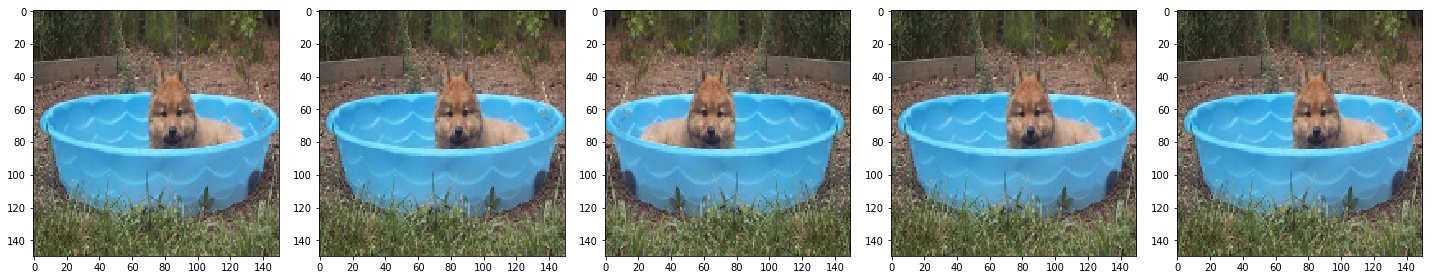

In [15]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
dispImages(augmented_images)

As you can see this particular image has been flipped from left to right or vversa

#### Rotation

In [16]:
image_generator = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_generator.flow_from_directory(batch_size=BATCH_SIZE, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


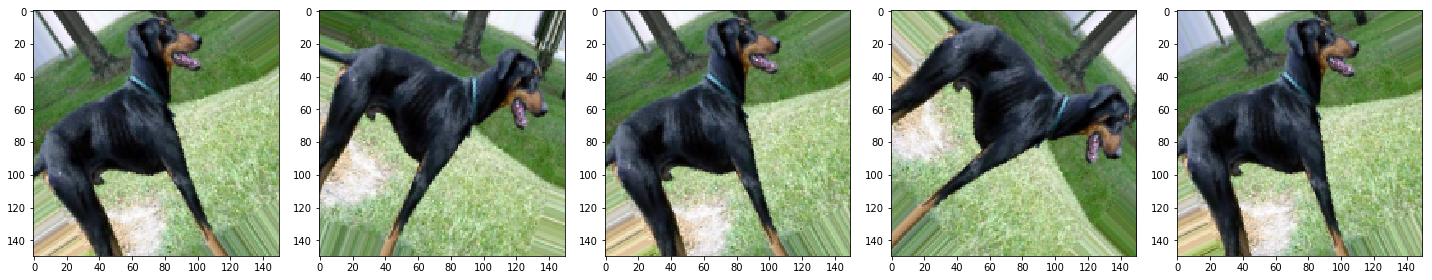

In [17]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

dispImages(augmented_images)

This dog image has been rotated by 45 degrees

#### Zooming

In [19]:
image_generator = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_generator.flow_from_directory(batch_size=BATCH_SIZE, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


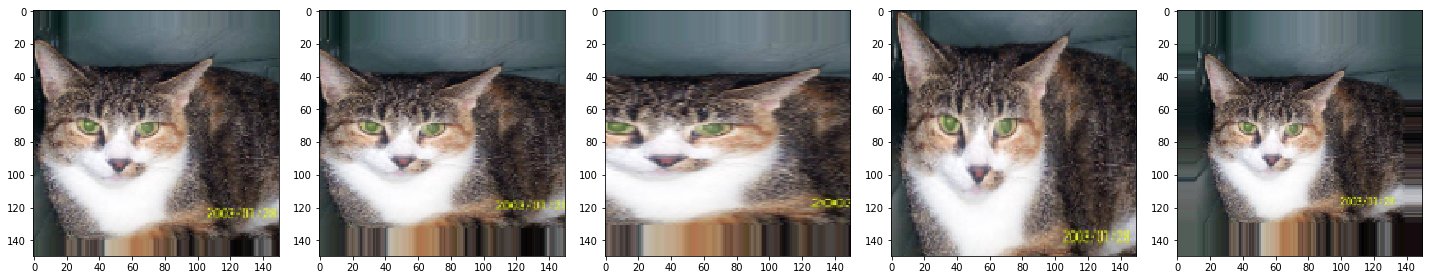

In [20]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

dispImages(augmented_images)

The cat image has been zoomed in and out by 0.5.

The **flow_from_directory** method loads images from the disk and applies rescaling and resizes them into required dimensions.

#### All transformations together!

In [21]:
image_generator_train = ImageDataGenerator(rescale = 1./255,
                                          rotation_range = 45,
                                          horizontal_flip = True,
                                          zoom_range = 0.2,
                                          width_shift_range = 0.2,
                                          height_shift_range = 0.2,
                                          shear_range = 0.2,
                                          fill_mode = 'nearest')

train_data_gen = image_generator_train.flow_from_directory(batch_size = BATCH_SIZE,
                                                          directory = train_dir,
                                                          shuffle = True,
                                                          target_size = (IMG_SHAPE, IMG_SHAPE),
                                                          class_mode = 'binary')

Found 2000 images belonging to 2 classes.


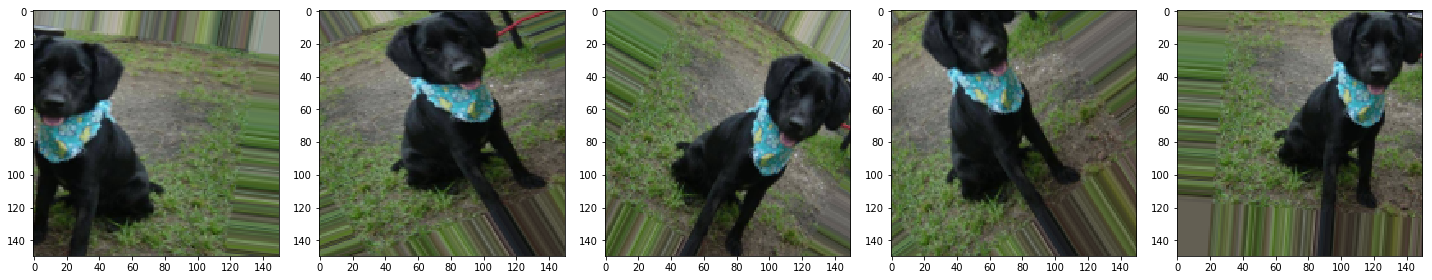

In [22]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
dispImages(augmented_images)

An image that has been augmented.

In [23]:
# validation data generator
image_generator_valid = ImageDataGenerator(rescale=1./255) #no transformations necessary

valid_data_gen = image_generator_valid.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=validation_dir,
                                                          target_size=(IMG_SHAPE, IMG_SHAPE),
                                                          class_mode='binary')

Found 1000 images belonging to 2 classes.


## Create the Model.

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

The above models has four convolution blocks each with a max pooling layer.

*tf.keras.layers.Dropout(0.5)* helps with preventing overfitting by setting 50% of values (getting into the dropout layer) to zero.

In [25]:
#compiling the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [27]:
#train the model
epochs=100
history = model.fit_generator(train_data_gen,
                             steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
                             epochs=epochs,
                             validation_data=valid_data_gen,
                             validation_steps=int(np.ceil(total_valid / float(BATCH_SIZE)))
                             )

Epoch 1/100
20/20 [==============================] - 535s 27s/step - loss: 0.7434 - acc: 0.5040 - val_loss: 0.6921 - val_acc: 0.5410
Epoch 2/100
20/20 [==============================] - 284s 14s/step - loss: 0.6930 - acc: 0.5135 - val_loss: 0.6883 - val_acc: 0.5630
Epoch 3/100
20/20 [==============================] - 361s 18s/step - loss: 0.6841 - acc: 0.5665 - val_loss: 0.6758 - val_acc: 0.5730
Epoch 4/100
20/20 [==============================] - 324s 16s/step - loss: 0.6757 - acc: 0.5650 - val_loss: 0.6705 - val_acc: 0.5370
Epoch 5/100
20/20 [==============================] - 240s 12s/step - loss: 0.6653 - acc: 0.5780 - val_loss: 0.6586 - val_acc: 0.5990
Epoch 6/100
20/20 [==============================] - 239s 12s/step - loss: 0.6474 - acc: 0.6060 - val_loss: 0.6515 - val_acc: 0.5890
Epoch 7/100
20/20 [==============================] - 237s 12s/step - loss: 0.6428 - acc: 0.6100 - val_loss: 0.6252 - val_acc: 0.6350
Epoch 8/100
20/20 [==============================] - 237s 12s/step - 

20/20 [==============================] - 232s 12s/step - loss: 0.4039 - acc: 0.8175 - val_loss: 0.4417 - val_acc: 0.7940
Epoch 63/100
20/20 [==============================] - 231s 12s/step - loss: 0.4066 - acc: 0.8240 - val_loss: 0.4302 - val_acc: 0.8050
Epoch 64/100
20/20 [==============================] - 232s 12s/step - loss: 0.3916 - acc: 0.8305 - val_loss: 0.4939 - val_acc: 0.7820
Epoch 65/100
20/20 [==============================] - 231s 12s/step - loss: 0.4075 - acc: 0.8145 - val_loss: 0.4530 - val_acc: 0.7910
Epoch 66/100
20/20 [==============================] - 234s 12s/step - loss: 0.4022 - acc: 0.8230 - val_loss: 0.4605 - val_acc: 0.7870
Epoch 67/100
20/20 [==============================] - 232s 12s/step - loss: 0.3862 - acc: 0.8270 - val_loss: 0.4411 - val_acc: 0.7890
Epoch 68/100
20/20 [==============================] - 234s 12s/step - loss: 0.3996 - acc: 0.8160 - val_loss: 0.4418 - val_acc: 0.7950
Epoch 69/100
20/20 [==============================] - 233s 12s/step - loss:

Looking at the Training Accuracy vis-a-vis the Validation Accuracy at epoch 100, the model can be said to generalize well. As there is no huge difference between the two accuracies.

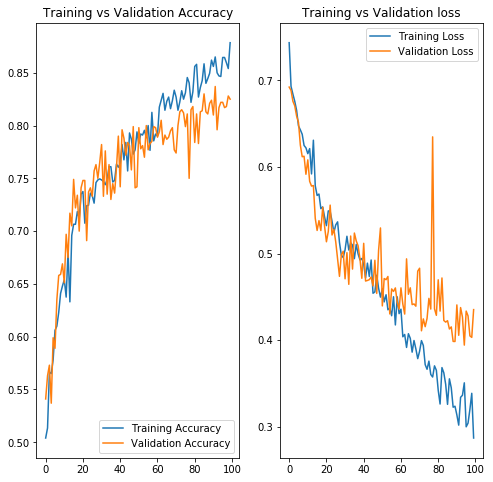

In [30]:
# Visualize the training results
train_acc = history.history['acc']
valid_acc = history.history['val_acc']

train_loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, valid_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, valid_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation loss')

plt.show()

The Training vs Validation Accuracy & Loss graphs shows how the model is generalizinf well. However, there are spikes and dips in the graph that are easily noticeable. In particular, at Epoch 78 we have a very dramatic spike and dip both in the Loss and Accuracy graphs respectively.
Turning to our training output, we can take a look at how the model was performing at this very epoch.
    
    The training accuracy = 0.8405 vs validation accuracy = 0.7500
    The training loss = 0.3575 vs validation loss = 0.6347
    
I really don't know what to make of this at this stage especially since it is a unique case.